In [1]:
import pandas as pd
import glob

# Read all CSV files in the genre folder
genre_files = glob.glob("1_movies_per_genre/*.csv")

all_movies = []
for file in genre_files:
    df = pd.read_csv(file)
    df['genre_source'] = file.split("/")[-1].replace(".csv", "")  # to keep genre info from filename
    all_movies.append(df)
    
movies_df = pd.concat(all_movies, ignore_index=True)
print(movies_df.shape)
movies_df.head()

(1700, 11)


,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,genre_source
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,1_movies_per_genre\Action
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...,1_movies_per_genre\Action
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...,1_movies_per_genre\Action
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...,1_movies_per_genre\Action
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...,1_movies_per_genre\Action


In [3]:
movies_df = movies_df.drop(columns=['movie_rated', 'release_date', 'review_url', 'genre_source'], errors='ignore')
movies_df = movies_df.rename(columns={
    'rating': 'imdb_rating'
})

movies_df.head()

,name,year,run_length,genres,imdb_rating,num_raters,num_reviews
0,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836
1,Inception,2010,2h 28min,Action; Adventure; Sci-Fi;,8.8,1981675,3820
2,The Matrix,1999,2h 16min,Action; Sci-Fi;,8.7,1619761,4281
3,The Lord of the Rings: The Fellowship of the Ring,2001,2h 58min,Action; Adventure; Drama;,8.8,1609165,5365
4,The Dark Knight Rises,2012,2h 44min,Action; Adventure;,8.4,1470329,2979


In [4]:
review_files = glob.glob("2_reviews_per_movie_raw/*.csv")

reviews = []
for file in review_files:
    df = pd.read_csv(file)
    df['movie_name'] = file.split("/")[-1].replace(".csv", "")
    reviews.append(df)
    
reviews_df = pd.concat(reviews, ignore_index=True)
print(reviews_df.shape)
reviews_df.head()

(795299, 8)


,username,rating,helpful,total,date,title,review,movie_name
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",2_reviews_per_movie_raw\10 Cloverfield Lane 2016
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016


In [5]:
reviews_df = reviews_df.drop(columns=['date'], errors='ignore')
reviews_df = reviews_df.rename(columns={
    'rating': 'user_rating',
    'title': 'review_title'
})
import os
# Update the 'movie_name' column to remove the path and extension
reviews_df['movie_name'] = reviews_df['movie_name'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

import re
# Remove the year (4 digits at the end) and strip trailing spaces
reviews_df['movie_name_clean'] = reviews_df['movie_name'].apply(lambda x: re.sub(r'\s+\d{4}$', '', x).strip())

# lowercase for consistent matching
reviews_df['movie_name_clean'] = reviews_df['movie_name_clean'].str.lower().str.strip()
reviews_df = reviews_df.drop(columns=['movie_name'], errors='ignore')
reviews_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean
0,Imme-van-Gorp,7,102,123,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 cloverfield lane
1,sonofocelot-1,5,385,500,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 cloverfield lane
2,mhodaee,5,110,143,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 cloverfield lane
3,fil-nik09,5,73,100,Hmmm...\n,"First of all, I must say that I was expecting ...",10 cloverfield lane
4,DVR_Brale,7,42,56,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 cloverfield lane


In [6]:
# Step 1: Read the descriptions CSV
descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')
# Step 2: Clean the movie title in descriptions_df
descriptions_df['title_clean'] = descriptions_df['title'].str.strip().str.lower()
# Step 3: Clean the name in movies_df to match
movies_df['name_clean'] = movies_df['name'].str.strip().str.lower()
# Step 4: Merge on the cleaned titles
movies_df = pd.merge(movies_df, descriptions_df[['title_clean', 'description']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column
movies_df.drop(columns=['title_clean'], inplace=True)
movies_df.shape

C:\Users\Hp\AppData\Local\Temp\ipykernel_10696\1660642918.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')


(1700, 9)

In [7]:
# Step 1: Read the overview CSV
overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')
# Step 2: Clean the movie title in overview_df
overview_df['title_clean'] = overview_df['original_title'].str.strip().str.lower()
# Step 3: Merge on the cleaned titles
movies_df = pd.merge(movies_df, overview_df[['title_clean', 'overview']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column
movies_df.drop(columns=['title_clean'], inplace=True)



C:\Users\Hp\AppData\Local\Temp\ipykernel_10696\1412965565.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')


In [8]:
import pandas as pd

# Step 1: Fill NaN values in 'overview' with values from 'description'
movies_df['overview'] = movies_df['overview'].fillna(movies_df['description'])
# Step 2: Drop the 'description' column
movies_df = movies_df.drop(columns=['description'])
# Step 3: Rename 'overview' column to 'description'
movies_df = movies_df.rename(columns={'overview': 'description'})
# check how many missing descriptions are still there
missing_descriptions = movies_df['description'].isna().sum()
print(f"Missing descriptions remaining: {missing_descriptions}")
movies_df.shape

Missing descriptions remaining: 155


(1984, 9)

In [9]:
# Step 1: Drop duplicates based on name_clean and description (to avoid repeated identical rows)
movies_df = movies_df.drop_duplicates(subset=['name_clean', 'description'])

# Step 2: Sort by length of description, longest first
movies_df['desc_len'] = movies_df['description'].apply(lambda x: len(str(x)))

# Step 3: Drop duplicates based on movie name, keeping the one with longest description
movies_df_unique = movies_df.sort_values(by='desc_len', ascending=False).drop_duplicates(subset='name_clean', keep='first')

# Step 4: Drop the temporary length column
movies_df_unique = movies_df_unique.drop(columns=['desc_len'])

# Reset index
movies_df_unique = movies_df_unique.reset_index(drop=True)

movies_df_unique.head()


,name,year,run_length,genres,imdb_rating,num_raters,num_reviews,name_clean,description
0,Ben-Hur,1959,3h 32min,Adventure; Drama; History;,8.1,213444,443,ben-hur,Ben-Hur is a 1959 epic film directed by Willia...
1,No Man's Land,2001,1h 38min,Comedy; Drama; War;,7.9,43762,181,no man's land,The film starts with a story about how two mon...
2,Gladiator,2000,2h 35min,Action; Adventure; Drama;,8.5,1297718,2636,gladiator,"In the year 180, the death of emperor Marcus A..."
3,Hercules,1997,1h 33min,Animation; Adventure; Comedy;,7.3,198490,218,hercules,"Fourteen hundred years ago, a tormented soul w..."
4,The Rookie,2002,2h 7min,Drama; Sport;,6.9,31474,176,the rookie,Jim Morris never made it out of the minor leag...


In [10]:
movies_df_unique.shape

(1145, 9)

In [11]:

# lowercase for consistent matching
movies_df_unique['name_clean'] = movies_df_unique['name'].str.lower().str.strip()

# Then merge or match
merged_df = pd.merge(reviews_df, movies_df_unique, left_on='movie_name_clean', right_on='name_clean', how='inner')

merged_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,name,year,run_length,genres,imdb_rating,num_raters,num_reviews,name_clean,description
0,Imme-van-Gorp,7,102,123,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
1,sonofocelot-1,5,385,500,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
2,mhodaee,5,110,143,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
3,fil-nik09,5,73,100,Hmmm...\n,"First of all, I must say that I was expecting ...",10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
4,DVR_Brale,7,42,56,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."


In [12]:

merged_df = merged_df.drop(['name'], axis =1)
merged_df = merged_df.drop(['name_clean'], axis =1)
merged_df.duplicated().any()
merged_df = merged_df.drop_duplicates()
merged_df.shape
merged_df = merged_df.dropna(subset=['description'])

print(merged_df.isnull().sum())
merged_df.shape

username            0
user_rating         0
helpful             0
total               0
review_title        0
review              0
movie_name_clean    0
year                0
run_length          0
genres              0
imdb_rating         0
num_raters          0
num_reviews         0
description         0
dtype: int64


(693135, 14)

In [13]:
# After cleaning user_rating if needed
merged_df['user_rating'] = pd.to_numeric(merged_df['user_rating'], errors='coerce')

# Count how many null (NaN) values are there in 'user_rating'
null_count = merged_df['user_rating'].isnull().sum()

print(f"Number of nulls in 'user_rating': {null_count}")

# Now drop rows where 'user_rating' is null
merged_df = merged_df.dropna(subset=['user_rating'])

# Reset index after dropping rows
merged_df = merged_df.reset_index(drop=True)
merged_df.shape


Number of nulls in 'user_rating': 78433


(614702, 14)

In [14]:
import pandas as pd
import numpy as np
import re

def transform_merged_df(df):
    # 1. Convert numeric columns where necessary
    df['helpful'] = pd.to_numeric(df['helpful'], errors='coerce')
    df['total'] = pd.to_numeric(df['total'], errors='coerce')
    df['num_raters'] = pd.to_numeric(df['num_raters'], errors='coerce')
    df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

    # 2. Convert runtime (e.g., "1h 43min" -> 103 minutes)
    def parse_runtime(s):
        if pd.isna(s):
            return np.nan
        match = re.match(r'(?:(\d+)h)?\s*(?:(\d+)min)?', str(s))
        if match:
            hours = int(match.group(1)) if match.group(1) else 0
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
        return np.nan
    
    df['run_length'] = df['run_length'].apply(parse_runtime)

    # 3. Clean string/text columns and handle 'no description', empty strings
    text_cols = ['username', 'review_title', 'review', 'genres', 'movie_name_clean', 'description']
    for col in text_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower()
            df[col] = df[col].replace(['nan', 'null', '', 'none', 'no description', '0'], np.nan)

    # 4. Drop duplicates 
    df = df.drop_duplicates()

    return df

merged_df = transform_merged_df(merged_df)
print(merged_df.dtypes)


username             object
user_rating         float64
helpful               int64
total                 int64
review_title         object
review               object
movie_name_clean     object
year                  int64
run_length            int64
genres               object
imdb_rating         float64
num_raters            int64
num_reviews           int64
description          object
dtype: object


In [15]:
merged_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,year,run_length,genres,imdb_rating,num_raters,num_reviews,description
0,imme-van-gorp,7.0,102,123,unfortunately the ending ruined an otherwise g...,this movie is full of suspense. it makes you g...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find..."
1,sonofocelot-1,5.0,385,500,...oh dear abrams. again.,i'll leave this review fairly concise. <br/><b...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find..."
2,mhodaee,5.0,110,143,"fantastic, gripping, thoroughly enjoyable, unt...",i give the 5/10 out of the credit i owe to the...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find..."
3,fil-nik09,5.0,73,100,hmmm...,"first of all, i must say that i was expecting ...",10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find..."
4,dvr_brale,7.0,42,56,slow building & plot alternating claustrophobi...,i've always loved movies with strong atmospher...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find..."


In [16]:
# content based recommendation system

from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler

# Drop duplicates to ensure each movie appears once
movie_features = merged_df.drop_duplicates(subset='movie_name_clean')[
    ['movie_name_clean', 'genres', 'imdb_rating', 'run_length']
].dropna()

# Process genres
movie_features['genres'] = movie_features['genres'].apply(lambda x: [g.strip() for g in x.split(';') if g.strip()])

# One-hot encode genres
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(
    mlb.fit_transform(movie_features['genres']),
    columns=mlb.classes_,
    index=movie_features.index
)

# Combine all features
content_features = pd.concat(
    [genres_encoded, movie_features[['imdb_rating', 'run_length']]],
    axis=1
).fillna(0)

# Normalize features
scaler = MinMaxScaler()
content_features_scaled = pd.DataFrame(
    scaler.fit_transform(content_features),
    columns=content_features.columns,
    index=movie_features['movie_name_clean']
)


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_movies(movie_name, top_n=5):
    if movie_name not in content_features_scaled.index:
        return "Movie not found in dataset."
    
    movie_vector = content_features_scaled.loc[movie_name].values.reshape(1, -1)
    all_movies = content_features_scaled.drop(index=movie_name)
    
    similarities = cosine_similarity(movie_vector, all_movies.values)[0]
    similar_indices = similarities.argsort()[::-1][:top_n]
    recommendations = all_movies.iloc[similar_indices]
    
    return recommendations.index.tolist()


In [18]:
recommend_similar_movies('Inception', top_n=5)


'Movie not found in dataset.'

In [19]:
recommend_similar_movies('up', top_n=5)


['inside out', 'finding nemo', 'toy story 3', 'aladdin', 'toy story 2']

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Compute cosine similarity between movies
cosine_sim = cosine_similarity(content_features_scaled)

# Step 2: Create a mapping from movie name to index
movie_indices = {movie: idx for idx, movie in enumerate(movie_features['movie_name_clean'])}

# Step 3: Sample a smaller dataset for evaluation
sampled_df = merged_df.sample(n=2000, random_state=42)  # <-- sample only 5,000 ratings

y_true = []
y_pred = []

for idx, row in sampled_df.iterrows():
    movie = row['movie_name_clean']
    true_rating = row['user_rating']
    
    if movie in movie_indices:
        movie_idx = movie_indices[movie]
        
        # Find similarity scores with all other movies
        sim_scores = cosine_sim[movie_idx]
        
        # Pick top N similar movies (excluding itself)
        similar_indices = sim_scores.argsort()[::-1][1:11]
        
        # Get the names of similar movies
        similar_movies = movie_features['movie_name_clean'].iloc[similar_indices]
        
        # Fetch user ratings for similar movies
        similar_ratings = merged_df[merged_df['movie_name_clean'].isin(similar_movies)]['user_rating']
        
        if not similar_ratings.empty:
            predicted_rating = similar_ratings.mean()
            
            y_true.append(true_rating)
            y_pred.append(predicted_rating)

# Step 4: Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"Content-Based Recommendation System - RMSE: {rmse:.4f}")
print(f"Content-Based Recommendation System - MAE: {mae:.4f}")


Content-Based Recommendation System - RMSE: 2.7884
Content-Based Recommendation System - MAE: 2.2013


In [21]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Use the 'content_features_scaled' you already created earlier
# (it has normalized genre + imdb_rating + run_length_min)

# Convert the features DataFrame to a numpy array
content_features_array = content_features_scaled.values

# Calculate cosine similarity between all movies
cosine_sim = cosine_similarity(content_features_array, content_features_array)

# Get movie indices
movie_indices = {movie: idx for idx, movie in enumerate(content_features_scaled.index)}


In [22]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Clean and split genres into list
merged_df['genres_clean'] = merged_df['genres'].apply(lambda x: [g.strip() for g in str(x).split(';') if g.strip()])

# Drop duplicate movie entries and keep only name + genre
unique_movies_df = merged_df[['movie_name_clean', 'genres_clean']].drop_duplicates(subset='movie_name_clean').reset_index(drop=True)

# Step 2: Apply MultiLabelBinarizer on genre list
mlb = MultiLabelBinarizer()
genre_features = mlb.fit_transform(unique_movies_df['genres_clean'])

# Step 3: Map movie names to feature vectors
movie_index = {movie: idx for idx, movie in enumerate(unique_movies_df['movie_name_clean'])}
movie_features = genre_features


In [23]:
# Build user -> {movie: rating} dict
user_movie_matrix = {}

for row in merged_df.itertuples():
    user = row.username
    movie = row.movie_name_clean
    rating = row.user_rating
    
    if user not in user_movie_matrix:
        user_movie_matrix[user] = {}
    user_movie_matrix[user][movie] = rating


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

def predict_content_based(user, target_movie):
    if target_movie not in movie_indices or user not in user_movie_matrix:
        return None

    user_rated_movies = user_movie_matrix[user]
    similarities = []
    weighted_ratings = []

    for rated_movie, rating in user_rated_movies.items():
        if rated_movie == target_movie or rated_movie not in movie_indices:
            continue

        # Get vector indices
        i = movie_indices[rated_movie]
        j = movie_indices[target_movie]

        vec_i = movie_features[i]
        vec_j = movie_features[j]
        sim = cosine_similarity([vec_i], [vec_j])[0][0]

        similarities.append(sim)
        weighted_ratings.append(float(rating) * sim)

    if not similarities or sum(similarities) == 0:
        return None

    return sum(weighted_ratings) / sum(similarities)


In [25]:
from sklearn.model_selection import train_test_split

# Filter only needed columns for ratings
ratings_df = merged_df[['username', 'movie_name_clean', 'user_rating']].drop_duplicates()

# Split into train and test sets
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual = []
predicted = []

# Use a small sample to avoid long runtimes
sample_df = merged_df.sample(1000, random_state=42)

for row in sample_df.itertuples():
    user = row.username
    movie = row.movie_name_clean
    rating = row.user_rating

    pred = predict_content_based(user, movie)
    if pred is not None:
        actual.append(rating)
        predicted.append(pred)

# Compute metrics
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f"✅ Content-Based (Genres Only) RMSE: {rmse:.4f}")
print(f"✅ Content-Based (Genres Only) MAE: {mae:.4f}")


✅ Content-Based (Genres Only) RMSE: 2.4292
✅ Content-Based (Genres Only) MAE: 1.7145


In [27]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

def clean_description(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # remove non-letters
    tokens = tokenizer.tokenize(text.lower())  # lowercase and tokenize
    cleaned = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(cleaned)


In [28]:
import re
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer

# Custom English stopwords
custom_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
    'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them',
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
    'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
}

# Initialize tokenizer and lemmatizer
tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()

# Clean function
def clean_description(text):
    # Lowercase and remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', str(text).lower())
    
    # Tokenize using TreebankWordTokenizer
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) > 2]
    
    return ' '.join(tokens)


In [29]:
# --- Apply to Your Dataset ---
merged_df['cleaned_description'] = merged_df['description'].apply(clean_description)


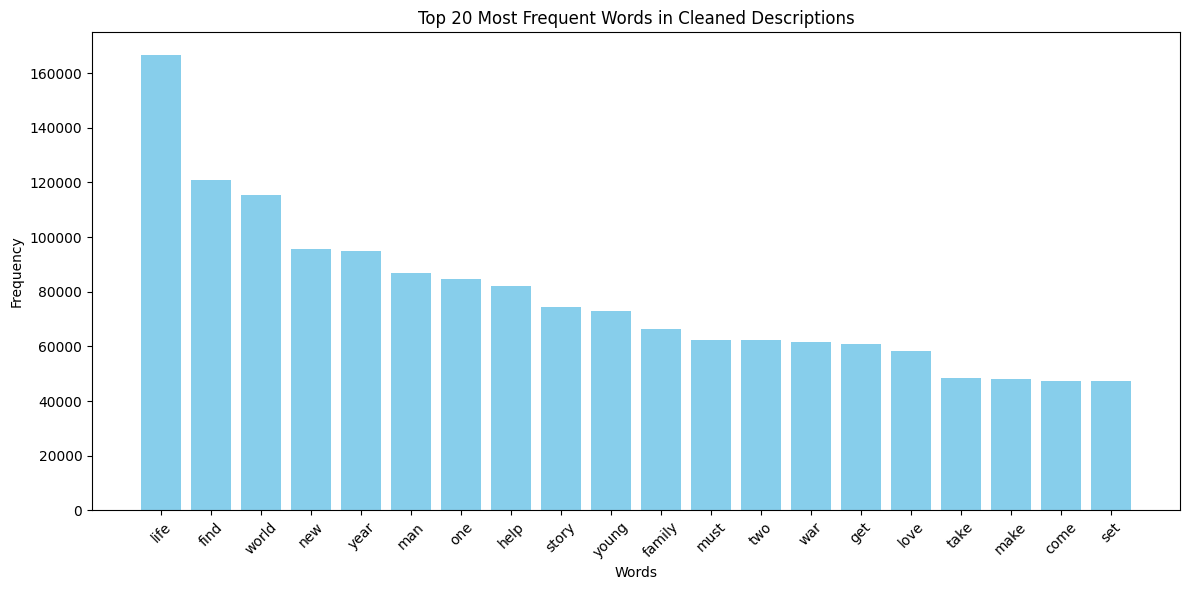

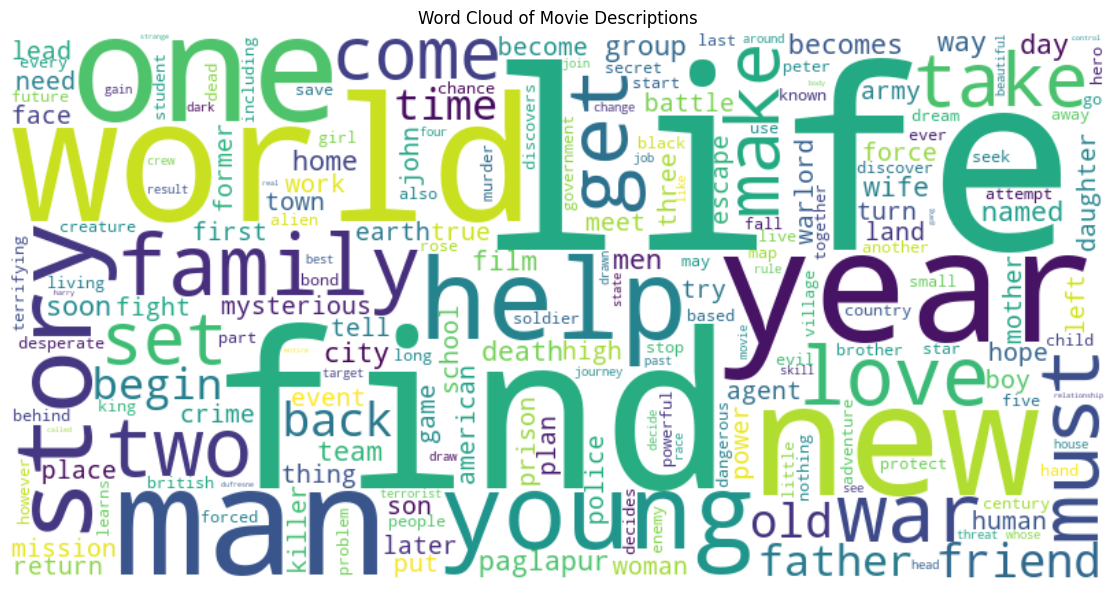

In [30]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all cleaned descriptions
all_words = ' '.join(merged_df['cleaned_description'])

# Tokenize all words
all_tokens = all_words.split()

# Count word frequencies
word_freq = Counter(all_tokens)
top_words = word_freq.most_common(20)

# --- Bar Plot ---
words, counts = zip(*top_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Cleaned Descriptions")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- Word Cloud ---
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Descriptions")
plt.tight_layout()
plt.show()


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)

# Fit and transform
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['cleaned_description'])

# Optional: Check the shape
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")


TF-IDF matrix shape: (614698, 8075)


In [41]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 1: Remove duplicate movie names
unique_movies_df = merged_df.drop_duplicates(subset='movie_name_clean')

# Step 2: Sample safely
sample_size = min(10000, len(unique_movies_df))
sample_df = unique_movies_df.sample(n=sample_size, random_state=42)
print(len(unique_movies_df))
# Step 3: TF-IDF transform
sample_tfidf = tfidf_vectorizer.transform(sample_df['cleaned_description'])

# Step 4: Compute cosine similarity matrix
cosine_sim_sample = cosine_similarity(sample_tfidf, sample_tfidf)


# Step 2: Function to get top N recommendations for a movie
def get_recommendations_sampled(movie_name, top_n=5):
    # Search in the sampled dataframe
    idx = sample_df[sample_df['movie_name_clean'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in sample!"
    
    idx = sample_df.index.get_loc(idx[0])  # Get positional index for cosine matrix
    sim_scores = list(enumerate(cosine_sim_sample[idx]))
    
    # Sort by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the movie itself and get top N
    top_indices = [i for i, _ in sim_scores[1:top_n+1]]
    
    return sample_df.iloc[top_indices][['movie_name_clean', 'description']]


# Example usage:
get_recommendations_sampled("jurassic park", top_n=5)
get_recommendations_sampled("inception", top_n=5)

931


,movie_name_clean,description
294695,minority report,john anderton is a top 'precrime' cop in the l...
262257,law abiding citizen,a frustrated man decides to take justice into ...
329787,pitch perfect 2,"the bellas are back, and they are better than ..."
164306,from hell,frederick abberline is an opium-huffing inspec...
326638,peaceful warrior,a chance encounter with a stranger changes the...


In [40]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import re
from nltk.tokenize import TreebankWordTokenizer

# ✅ 1. Use a basic tokenizer and custom stopwords list (no NLTK downloads needed)
tokenizer = TreebankWordTokenizer()
custom_stopwords = set([
    "the", "a", "an", "in", "on", "at", "for", "to", "of", "and", "or", "is", "it",
    "this", "that", "with", "as", "its", "by", "from", "was", "were", "be", "has",
    "had", "he", "she", "they", "them", "his", "her", "you", "i", "we", "but", "not"
])

# ✅ 2. Clean function for movie descriptions
def clean_description(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [word for word in tokens if word not in custom_stopwords]
    return " ".join(filtered_tokens)

# ✅ 3. Apply cleaning
merged_df['cleaned_description'] = merged_df['description'].apply(clean_description)

# ✅ 4. Sample data to prevent memory issues
sample_df = merged_df.dropna(subset=['cleaned_description']).sample(n=10000, random_state=42).reset_index(drop=True)

# ✅ 5. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
sample_tfidf = tfidf_vectorizer.fit_transform(sample_df['cleaned_description'])

# ✅ 6. Compute cosine similarity using linear_kernel (faster)
cosine_sim_sample = linear_kernel(sample_tfidf, sample_tfidf)

# ✅ 7. Recommendation function
def get_recommendations(movie_name, top_n=5):
    # Find index of the movie in sample_df
    idx_list = sample_df[sample_df['movie_name_clean'].str.lower() == movie_name.lower()].index.tolist()
    if not idx_list:
        return "Movie not found in sample!"
    
    idx = idx_list[0]
    # Compute similarity scores
    sim_scores = list(enumerate(cosine_sim_sample[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Avoid duplicates by excluding same movie names
    seen = set([movie_name.lower()])
    recommendations = []
    
    for i, score in sim_scores[1:]:
        candidate = sample_df.iloc[i]
        name = candidate['movie_name_clean'].lower()
        if name not in seen:
            recommendations.append(candidate)
            seen.add(name)
        if len(recommendations) >= top_n:
            break

    return pd.DataFrame(recommendations)[['movie_name_clean', 'description']]


# ✅ 8. Example usage
print(get_recommendations("inception", top_n=5))


         movie_name_clean                                        description
239       minority report  john anderton is a top 'precrime' cop in the l...
188   law abiding citizen  a frustrated man decides to take justice into ...
19        pitch perfect 2  the bellas are back, and they are better than ...
2051            from hell  frederick abberline is an opium-huffing inspec...
2734     peaceful warrior  a chance encounter with a stranger changes the...


In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Sample the data (adjust as needed)
sample_df = merged_df.sample(n=5000, random_state=42)

# Step 2: Drop duplicates by movie title
sample_df = sample_df.drop_duplicates(subset='movie_name_clean')

# Step 3: Drop entries with no proper description
sample_df = sample_df[~sample_df['description'].str.lower().str.contains("no description available", na=False)]

# Step 4: Fill missing values
sample_df['description'] = sample_df['description'].fillna('')
sample_df['genres'] = sample_df['genres'].fillna('')
sample_df['user_rating'] = sample_df['user_rating'].fillna(0)

# Step 5: Combine features
def combine_features(row):
    return f"{row['description']} {row['genres']} rating: {row['user_rating']}"

sample_df['combined_features'] = sample_df.apply(combine_features, axis=1)

# Step 6: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(sample_df['combined_features'])

# Step 7: Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Reset index to align with cosine similarity
sample_df = sample_df.reset_index(drop=True)

# Step 8: Recommendation function
def get_recommendations(title, top_n=5):
    idx_list = sample_df[sample_df['movie_name_clean'].str.lower() == title.lower()].index
    if len(idx_list) == 0:
        return "Movie not found in sample."
    
    idx = idx_list[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i for i, score in sim_scores[1:top_n+1]]
    
    return sample_df.iloc[top_indices][['movie_name_clean', 'description', 'genres', 'user_rating']]

# Step 9: Try it!
recommendations = get_recommendations("inception", top_n=5)
print(recommendations)


      movie_name_clean                                        description  \
366  the fifth element  in 2257, a taxi driver is unintentionally give...   
19     pitch perfect 2  the bellas are back, and they are better than ...   
130  where eagles dare  world war ii is raging, and an american genera...   
421      black panther  t'challa, the superpowered new leader of the h...   
762   peaceful warrior  a chance encounter with a stranger changes the...   

                         genres  user_rating  
366  action; adventure; sci-fi;          8.0  
19               comedy; music;          7.0  
130     action; adventure; war;          9.0  
421  action; adventure; sci-fi;          6.0  
762      drama; romance; sport;         10.0  


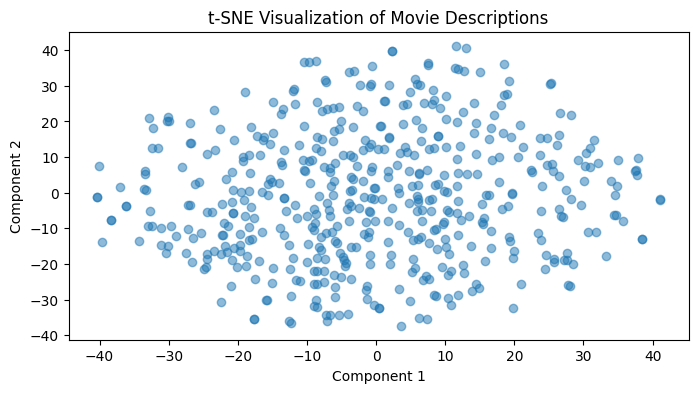

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensionality of TF-IDF vectors
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

# Plot sample points
plt.figure(figsize=(8, 4))
plt.scatter(tsne_result[:500, 0], tsne_result[:500, 1], alpha=0.5)
plt.title("t-SNE Visualization of Movie Descriptions")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [47]:
merged_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,year,run_length,genres,imdb_rating,num_raters,num_reviews,description,genres_clean,cleaned_description
0,imme-van-gorp,7.0,102,123,unfortunately the ending ruined an otherwise g...,this movie is full of suspense. it makes you g...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",after car accident michelle awakens find herse...
1,sonofocelot-1,5.0,385,500,...oh dear abrams. again.,i'll leave this review fairly concise. <br/><b...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",after car accident michelle awakens find herse...
2,mhodaee,5.0,110,143,"fantastic, gripping, thoroughly enjoyable, unt...",i give the 5/10 out of the credit i owe to the...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",after car accident michelle awakens find herse...
3,fil-nik09,5.0,73,100,hmmm...,"first of all, i must say that i was expecting ...",10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",after car accident michelle awakens find herse...
4,dvr_brale,7.0,42,56,slow building & plot alternating claustrophobi...,i've always loved movies with strong atmospher...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",after car accident michelle awakens find herse...


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
import numpy as np

# 1. TF-IDF encoding for cleaned descriptions
tfidf = TfidfVectorizer(stop_words='english', max_features=300)
description_features = tfidf.fit_transform(merged_df['cleaned_description'].fillna('')).toarray()

# 2. One-hot encoding for cleaned genres
mlb = MultiLabelBinarizer()
genres_features = mlb.fit_transform(merged_df['genres_clean'])

# 3. Normalize numerical features (imdb_rating and run_length)
scaler = MinMaxScaler()
# run_length is already in minutes in your data
numerical_features = scaler.fit_transform(merged_df[['imdb_rating', 'run_length']].fillna(0))

# 4. Combine all feature sets horizontally
features_combined = np.hstack([description_features, genres_features, numerical_features])

print(f"features_combined shape: {features_combined.shape}")

features_combined shape: (614698, 320)


In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

# Ensure 'name_clean' is of type string and 'rating_x' is of type float
merged_df['movie_name_clean'] = merged_df['movie_name_clean'].astype(str)
merged_df['user_rating'] = pd.to_numeric(merged_df['user_rating'], errors='coerce')

sample_size = 10000  # You can adjust
sample_indices = merged_df.sample(n=sample_size, random_state=42).index

# Create features_combined only for the sample
sample_features = features_combined[sample_indices]

# Step 1: Compute cosine similarity for the combined features (e.g., description, genres)
cosine_sim = cosine_similarity(sample_features)

# Step 2: Map movie titles to indices
indices = pd.Series(sample_df.index, index=sample_df['movie_name_clean']).drop_duplicates()

# Step 3: Predict a user's rating for each movie based on similar ones
def predict_rating(user_id, movie_idx, user_ratings, similarity_matrix, k=5):
    rated_indices = user_ratings.index
    sim_scores = similarity_matrix[movie_idx, rated_indices]
    
    if np.sum(sim_scores) == 0:
        return np.mean(user_ratings)  # fallback if no similarity
    
    weighted_sum = np.dot(sim_scores, user_ratings)
    sim_sum = np.sum(sim_scores)
    return weighted_sum / sim_sum

# Step 4: Evaluate on a small user subset (to save memory)
sample_users = merged_df['username'].dropna().unique()[:100]

actual_ratings = []
predicted_ratings = []

# Ensure that we're only using valid ratings (non-null)
merged_df = merged_df.dropna(subset=['user_rating', 'movie_name_clean'])

for user in sample_users:
    user_df = merged_df[merged_df['username'] == user]
    
    # Skip users without any valid ratings
    if len(user_df) == 0:
        continue
    
    rated_movies = user_df['movie_name_clean'].values
    ratings = user_df['user_rating'].values
    
    for i in range(len(rated_movies)):
        try:
            target_title = rated_movies[i]
            target_rating = ratings[i]

            # Remove this rating temporarily for prediction
            temp_rated = np.delete(ratings, i)
            temp_titles = np.delete(rated_movies, i)

            # Ensure we have valid indices for all movies
            sim_idxs = [indices.get(t, None) for t in temp_titles if t in indices]
            sim_ratings = [ratings[j] for j, t in enumerate(temp_titles) if t in indices]

            if len(sim_idxs) < 2:
                continue  # Not enough data to compute similarity for this movie

            # Get the index of the target movie
            target_idx = indices.get(target_title, None)
            if target_idx is None:
                continue  # Skip if the movie title is not in the indices

            # Predict the rating
            sim_scores = cosine_sim[target_idx, sim_idxs]
            prediction = np.dot(sim_scores, sim_ratings) / np.sum(sim_scores)

            actual_ratings.append(target_rating)
            predicted_ratings.append(prediction)
        except Exception as e:
            # Catch errors and skip
            print(f"Skipping user {user} for movie {rated_movies[i]} due to error: {e}")
            continue

# Step 5: Calculate RMSE and MAE
if actual_ratings and predicted_ratings:  # Ensure we have data to calculate
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    mae = mean_absolute_error(actual_ratings, predicted_ratings)

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
else:
    print("No valid ratings for evaluation.")


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


RMSE: 1.6447
MAE: 1.2295


In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

# Ensure data types
merged_df['movie_name_clean'] = merged_df['movie_name_clean'].astype(str)
merged_df['user_rating'] = pd.to_numeric(merged_df['user_rating'], errors='coerce')

# Compute cosine similarity on content features
cosine_sim = cosine_similarity(sample_features)

# Filter merged_df to only include valid movies
valid_movies = set(sample_df['movie_name_clean'])
merged_df = merged_df[merged_df['movie_name_clean'].isin(valid_movies)]

# Map movie titles to indices
indices = pd.Series(sample_df.index, index=sample_df['movie_name_clean']).drop_duplicates()

# Drop null ratings
merged_df = merged_df.dropna(subset=['user_rating', 'movie_name_clean'])

# Group ratings by user
user_group = merged_df.groupby('username')

# Prepare prediction/evaluation lists
actuals = []
preds = []

top_n = 5

# Iterate over a sample of users
sample_users = merged_df['username'].dropna().unique()[:100]

for username in sample_users:
    if username not in user_group.groups:
        continue

    user_ratings_df = user_group.get_group(username)

    for _, row in user_ratings_df.iterrows():
        target_title = row['movie_name_clean']
        actual_rating = row['user_rating']

        # Skip if movie not in index
        if target_title not in indices:
            continue

        target_idx = indices[target_title]
        if isinstance(target_idx, pd.Series):
            target_idx = target_idx.iloc[0]

        # Validate index
        if target_idx is None or int(target_idx) >= cosine_sim.shape[0]:
            continue

        target_idx = int(target_idx)

        # Get similar movies
        sim_scores = list(enumerate(cosine_sim[target_idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:top_n + 1]

        sim_indices = [i for i, _ in sim_scores]
        #sim_titles = [sample_df.iloc[i]['movie_name_clean'] for i in sim_indices]
        sim_titles = []
        for i in sim_indices:
            if 0 <= i < len(sample_df):
                sim_titles.append(sample_df.iloc[i]['movie_name_clean'])


        ratings = []
        sims = []

        for sim_title in sim_titles:
            if sim_title in user_ratings_df['movie_name_clean'].values:
                r = user_ratings_df[user_ratings_df['movie_name_clean'] == sim_title]['user_rating'].values
                if len(r) > 0:
                    ratings.append(r[0])
                    sim_idx = indices.get(sim_title)
                    if isinstance(sim_idx, pd.Series):
                        sim_idx = sim_idx.iloc[0]
                    sim_idx = int(sim_idx)
                    if sim_idx < cosine_sim.shape[0]:
                        sims.append(cosine_sim[target_idx][sim_idx])

        if ratings and sims and np.sum(sims) != 0:
            pred_rating = np.dot(sims, ratings) / np.sum(sims)
            actuals.append(actual_rating)
            preds.append(pred_rating)

# Evaluate predictions
if preds:
    rmse = np.sqrt(mean_squared_error(actuals, preds))
    mae = mean_absolute_error(actuals, preds)
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
else:
    print("⚠️ No predictions made — check filtering or dataset content.")

# Precision/Recall evaluation
def precision_recall_at_k(user_rated_movies, recommended_movies, k=5, threshold=4.0):
    actual_relevant = set([title for title, rating in user_rated_movies if rating >= threshold])
    recommended = set(recommended_movies[:k])

    true_positives = len(recommended & actual_relevant)
    precision = true_positives / len(recommended) if recommended else 0
    recall = true_positives / len(actual_relevant) if actual_relevant else 0
    return precision, recall

precision_all_users = []
recall_all_users = []

for username in sample_users:
    if username not in user_group.groups:
        continue

    user_ratings_df = user_group.get_group(username)

    # Get rated movies
    user_rated_movies = list(zip(user_ratings_df['movie_name_clean'], user_ratings_df['user_rating']))

    # Recommend based on highest predicted scores
    recommended_movies = []
    for _, row in user_ratings_df.iterrows():
        movie = row['movie_name_clean']
        if movie in indices:
            idx = indices[movie]
            if isinstance(idx, pd.Series):
                idx = idx.iloc[0]
            idx = int(idx)
            if idx < cosine_sim.shape[0]:
                similar_scores = list(enumerate(cosine_sim[idx]))
                similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
                similar_scores = similar_scores[1:top_n + 1]
                #recommended_movies += [sample_df.iloc[i]['movie_name_clean'] for i, _ in similar_scores]
                recommended_movies += [sample_df.iloc[i]['movie_name_clean'] for i, _ in similar_scores if i < len(sample_df)]


    recommended_movies = list(dict.fromkeys(recommended_movies))  # Remove duplicates

    precision, recall = precision_recall_at_k(user_rated_movies, recommended_movies, k=top_n)
    precision_all_users.append(precision)
    recall_all_users.append(recall)

if precision_all_users and recall_all_users:
    print(f"Average Precision: {np.mean(precision_all_users):.4f}")
    print(f"Average Recall: {np.mean(recall_all_users):.4f}")
else:
    print("⚠️ No precision/recall scores available — check input ratings or recommendation logic.")


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


RMSE: 1.2775
MAE: 0.6792
Average Precision: 0.1418
Average Recall: 0.0311


In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# === Step 1: Load your data (assuming merged_df is already loaded) ===
# Sample for memory efficiency
sample_df = merged_df.sample(n=10000, random_state=42).reset_index(drop=True)
# Deduplicate the DataFrame based on movie name and description
sample_df_unique = sample_df.drop_duplicates(subset=['movie_name_clean', 'description'])


# === Step 2: Fill missing values and create combined features ===
sample_df_unique['description'] = sample_df_unique['description'].fillna("")
sample_df_unique['genres'] = sample_df_unique['genres'].fillna("")
sample_df_unique['imdb_rating'] = sample_df_unique['imdb_rating'].fillna(0)
sample_df_unique['user_rating'] = sample_df_unique['user_rating'].fillna(0)

# Combine features
sample_df_unique['combined_features'] = (
    sample_df_unique['description'].fillna('') + ' ' +
    sample_df_unique['genres'].fillna('') + ' ' +
    sample_df_unique['imdb_rating'].astype(str) + ' ' +
    sample_df_unique['user_rating'].astype(str)
)

# === Step 3: TF-IDF Vectorization ===
tfidf = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(sample_df_unique['combined_features'])


# TF-IDF Vectorization
#tfidf_vectorizer = TfidfVectorizer(stop_words='english')
#tfidf_matrix = tfidf_vectorizer.fit_transform(sample_df_unique['combined_features'])

# Cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Reset index for accurate lookup
sample_df_unique = sample_df_unique.reset_index(drop=True)

# === Step 4: Dimensionality Reduction ===
svd = TruncatedSVD(n_components=200, random_state=42)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# === Step 5: Nearest Neighbors Model ===
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(reduced_matrix)

# === Step 6: Recommendation Function ===
def get_recommendations(movie_name, top_n=5):
    movie_name = movie_name.lower()
    
    # Find index of the movie
    matches = sample_df_unique[sample_df_unique['movie_name_clean'].str.lower() == movie_name]
    if matches.empty:
        return "Movie not found."

    idx = matches.index[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Collect top N unique recommendations
    recommended_indices = []
    recommended_titles = set()

    for i, score in sim_scores:
        title = sample_df_unique.iloc[i]['movie_name_clean']
        if title != movie_name and title not in recommended_titles:
            recommended_indices.append(i)
            recommended_titles.add(title)
        if len(recommended_indices) >= top_n:
            break

    return sample_df_unique.iloc[recommended_indices][['movie_name_clean', 'description', 'genres', 'imdb_rating', 'user_rating']]

# === Example Usage ===
recommendations = get_recommendations("inception", top_n=5)
print(recommendations)


C:\Users\Hp\AppData\Local\Temp\ipykernel_10696\4095756423.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_unique['description'] = sample_df_unique['description'].fillna("")
C:\Users\Hp\AppData\Local\Temp\ipykernel_10696\4095756423.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_unique['genres'] = sample_df_unique['genres'].fillna("")
C:\Users\Hp\AppData\Local\Temp\ipykernel_10696\4095756423.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

      movie_name_clean                                        description  \
760  the fifth element  in 2257, a taxi driver is unintentionally give...   
419      black panther  t'challa, the superpowered new leader of the h...   
188  where eagles dare  world war ii is raging, and an american genera...   
765      the wolverine  wolverine faces his ultimate nemesis - and tes...   
109         spider-man  after being bitten by a genetically altered sp...   

                         genres  imdb_rating  user_rating  
760  action; adventure; sci-fi;          7.7          8.0  
419  action; adventure; sci-fi;          7.3          1.0  
188     action; adventure; war;          7.7          7.0  
765  action; adventure; sci-fi;          6.7          7.0  
109  action; adventure; sci-fi;          7.3          8.0  


In [63]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Assuming you have a list of predicted ratings for the movies in the dataset
# For example:
predicted_ratings = np.array([7.7, 7.3, 7.7, 6.7, 7.3])  # Replace with your actual predicted ratings

# Actual ratings from the 'rating_x' column
actual_ratings = np.array([8.0, 1.0, 7.0, 7.0, 8.0])  # Replace with actual ratings from 'rating_x'

# Define a threshold for liking/disliking a movie
threshold = 6.5

# Convert actual ratings and predicted ratings into binary values based on the threshold
binary_actual = (actual_ratings >= threshold).astype(int)  # 1 if liked, 0 if disliked
binary_pred = (predicted_ratings >= threshold).astype(int)  # Same for predicted ratings

# Calculate Precision and Recall
precision = precision_score(binary_actual, binary_pred)
recall = recall_score(binary_actual, binary_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.8000
Recall: 1.0000


In [64]:
import numpy as np
from sklearn.metrics import f1_score, mean_squared_error

# Provided ratings
predicted_ratings = np.array([7.7, 7.3, 7.7, 6.7, 7.3])  # Replace with your actual predicted ratings
actual_ratings = np.array([8.0, 1.0, 7.0, 7.0, 8.0])  # Replace with actual ratings from 'rating_x'

# Define a threshold for liking/disliking a movie
threshold = 6.5

# Convert ratings into binary values (1 if liked, 0 if disliked)
y_true_bin = [1 if rating >= threshold else 0 for rating in actual_ratings]
y_pred_bin = [1 if rating >= threshold else 0 for rating in predicted_ratings]

# Calculate F1-Score
f1 = f1_score(y_true_bin, y_pred_bin)
print(f"F1-Score: {f1:.4f}")

# Calculate RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f"RMSE: {rmse:.4f}")


F1-Score: 0.8889
RMSE: 2.8583


In [65]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

inputs = tokenizer("Hello BERT!", return_tensors="pt")
outputs = model(**inputs)

print("BERT output shape:", outputs.last_hidden_state.shape)


BERT output shape: torch.Size([1, 5, 768])


In [66]:
# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')


In [67]:
def get_bert_embeddings(texts, batch_size=16, max_length=128):
    embeddings = []
    
    # Process the texts in batches to reduce memory usage
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        
        # Tokenize the batch of texts
        inputs = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=max_length)
        
        # Get the embeddings (use [CLS] token's output)
        with torch.no_grad():
            outputs = model(**inputs)
            batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # Use the embeddings of [CLS] token
            
        embeddings.append(batch_embeddings)
    
    # Return the full list of embeddings
    return np.vstack(embeddings)

In [143]:
# Use a sample to avoid memory issues
sample_size = 500  # Adjust this size based on available memory
sample_df = merged_df.sample(n=sample_size, random_state=42)  # Randomly sample 100 rows

# Extract descriptions from the sample
movie_descriptions = sample_df['description'].dropna().tolist()  # Remove any rows with missing descriptions


In [144]:
# Generate BERT embeddings for the sampled movie descriptions
embeddings = get_bert_embeddings(movie_descriptions, batch_size=16, max_length=128)


In [145]:
# Compute similarity (for recommendation)
similarity_matrix = cosine_similarity(embeddings)


In [146]:
# Output the similarity matrix (showing similarity between movies)
print("Cosine Similarity Matrix:\n", similarity_matrix)


Cosine Similarity Matrix:
 [[1.0000001  0.84243464 0.874935   ... 0.8912727  0.92298293 0.9093467 ]
 [0.84243464 1.         0.8757068  ... 0.8806222  0.8906182  0.87682605]
 [0.874935   0.8757068  1.         ... 0.9146198  0.90107936 0.8955649 ]
 ...
 [0.8912727  0.8806222  0.9146198  ... 1.0000002  0.9078052  0.90581226]
 [0.92298293 0.8906182  0.90107936 ... 0.9078052  1.         0.9304443 ]
 [0.9093467  0.87682605 0.8955649  ... 0.90581226 0.9304443  0.9999998 ]]


In [147]:
# Example of recommending similar movies based on the first movie (index 0)
movie_index = 0
similar_movies = similarity_matrix[movie_index]

# Sorting movies based on similarity to the first movie
sorted_indices = np.argsort(similar_movies)[::-1]  # Sorting in descending order of similarity
#recommended_movies = [sample_df['name_clean'].iloc[i] for i in sorted_indices]
top_indices = [i for i in sorted_indices if i != movie_index][:5]


In [148]:
print(f"\nTop 5 movies similar to '{sample_df.iloc[movie_index]['movie_name_clean']}':\n")
for i in top_indices:
    print(f"- {sample_df.iloc[i]['movie_name_clean']}")


Top 5 movies similar to 'signs':

- the evil dead
- little miss sunshine
- gone girl
- edward scissorhands
- paranormal activity


In [149]:
# Check similarity values for the first movie
print("Similarities for the first movie:")
print(similarity_matrix[0])  # This will give you the similarity values with the first movie

# Check if the values are very similar
print("\nMax similarity value:", np.max(similarity_matrix[0]))
print("Min similarity value:", np.min(similarity_matrix[0]))


Similarities for the first movie:
[1.0000001  0.84243464 0.874935   0.84430575 0.9267045  0.8912679
 0.85483176 0.9146116  0.92607605 0.9219847  0.8979347  0.8652164
 0.9142689  0.8959836  0.866912   0.88743484 0.9060482  0.93100584
 0.8043736  0.9094671  0.9411435  0.8534045  0.90600383 0.8901516
 0.9059191  0.8940543  0.9063582  0.8748051  0.9069985  0.91241354
 0.9142902  0.9032463  0.8677095  0.8257482  0.80271953 0.916198
 0.87545043 0.90280056 0.92367315 0.91350216 0.8805703  0.8897971
 0.88642776 0.8221668  0.88883907 0.90285677 0.91056603 0.90280056
 0.9250431  0.91703606 0.88892984 0.8743745  0.8866135  0.90817153
 0.8877872  0.89501643 0.88459885 0.9443295  0.90096545 0.90271246
 0.92560494 0.90271246 0.8972355  0.90000737 0.92116857 0.8866805
 0.8961396  0.9076326  0.90844136 0.93100584 0.9028006  0.9266672
 0.88876325 0.9032463  0.8987429  0.9182543  0.82632667 0.90944105
 0.8924662  0.9031011  0.83986306 0.9003674  0.8958235  0.89631456
 0.84712136 0.8607787  0.92977124 0.

In [153]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

# Load your merged dataset (make sure it's already in your environment)
# merged_df = pd.read_csv("path_to_your_merged_data.csv")  # if not already loaded

# Filter all user ratings for the target movie "inception"
actual_df = merged_df[merged_df['movie_name_clean'].str.lower() == 'signs']

# Get the actual ratings (ground truth)
actual_ratings = actual_df['user_rating'].values

# Print how many actual ratings we have
print(f"Number of actual user ratings for 'signs': {len(actual_ratings)}")

# Predicted ratings from the top 5 BERT-based recommended movies
# Use actual 'rating_x' (user ratings) from merged_df for these movies
recommended_movies = [
    "the evil dead",
    "little miss sunshine",
    "gone girl",
    "edward scissorhands",
    "paranormal activity"
]

# Get average user rating_x for each of the recommended movies
predicted_ratings = []
for movie in recommended_movies:
    user_ratings = merged_df[merged_df['movie_name_clean'].str.lower() == movie]['user_rating'].values
    user_ratings = pd.to_numeric(user_ratings, errors='coerce')  # ensure numeric
    user_ratings = user_ratings[~np.isnan(user_ratings)]         # drop NaNs

    if len(user_ratings) > 0:
        predicted_ratings.append(np.mean(user_ratings))
    else:
        predicted_ratings.append(0)

predicted_ratings = np.array(predicted_ratings)
actual_ratings = actual_ratings[:len(predicted_ratings)]  # match lengths

# Binary conversion using threshold (liked = rating >= 6.5)
threshold = 6.5
actual_ratings = np.array(actual_ratings, dtype=np.float64)
actual_binary = actual_ratings >= threshold

#actual_binary = actual_ratings >= threshold
predicted_binary = predicted_ratings >= threshold

# Evaluation Metrics
precision = precision_score(actual_binary, predicted_binary)
recall = recall_score(actual_binary, predicted_binary)
f1 = f1_score(actual_binary, predicted_binary)
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

# Results
print(f"\n📊 Evaluation for BERT-based Recommendations (Target: signs)")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"RMSE: {rmse:.4f}")


Number of actual user ratings for 'signs': 1776

📊 Evaluation for BERT-based Recommendations (Target: signs)
Precision: 1.0000
Recall: 0.8000
F1-Score: 0.8889
RMSE: 2.0629


In [177]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

# Load and preprocess a small subset of your dataset, Drop duplicates and sample from the dataset
sample_data = merged_df.drop_duplicates(subset=['movie_name_clean']).sample(n=500, random_state=42).reset_index(drop=True)

# Replace 'Null' with actual NaN values
sample_data.loc[:, 'user_rating'] = sample_data['user_rating'].replace('Null', np.nan)

# Convert to numeric, coercing errors to NaN
sample_data.loc[:, 'user_rating'] = pd.to_numeric(sample_data['user_rating'], errors='coerce')

# Fill NaNs with 0 initially (to clean data before calculating averages)
sample_data.loc[:, 'user_rating'] = sample_data['user_rating'].fillna(0)

# Calculate global average excluding 0 ratings
global_avg = sample_data.loc[sample_data['user_rating'] != 0, 'user_rating'].mean()

# Replace 0.0 in rating_x with the average rating for that movie (excluding 0s), else use global_avg
sample_data.loc[:, 'rating_x'] = sample_data.groupby('movie_name_clean')['user_rating'].transform(
    lambda x: x.replace(0, x[x != 0].mean() if not x[x != 0].empty else global_avg)
)

# Handle missing descriptions
sample_data.loc[:, 'description'] = sample_data['description'].fillna('No description available')

# Step 1: Item-based Collaborative Filtering using cosine similarity
# Let's consider 'name_clean' as the movie name, and 'rating_x' as user ratings
movie_ratings_matrix = sample_data.pivot_table(index='username', columns='movie_name_clean', values='user_rating')

# Fill missing values with user mean for collaborative filtering
movie_ratings_matrix = movie_ratings_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

# In case some users have all NaNs (mean is still NaN), fill remaining NaNs with global mean
global_mean = movie_ratings_matrix.stack().mean()
movie_ratings_matrix = movie_ratings_matrix.fillna(global_mean)
movie_ratings_matrix = movie_ratings_matrix.apply(lambda row: row.replace(0, row.mean()), axis=1)


# Calculate cosine similarity between movies
cosine_sim = cosine_similarity(movie_ratings_matrix.T)

# Step 2: Content-Based Filtering using BERT embeddings for movie descriptions
# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a movie description
def get_bert_embedding(description):
    inputs = tokenizer(description, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Get embeddings for each movie description
movie_descriptions = sample_data['description'].tolist()  # Ensure it's a plain list

# Collect embeddings as 2D vectors
embeddings = []

for desc in movie_descriptions:
    inputs = tokenizer(desc, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    mean_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()
    embeddings.append(mean_embedding)

# Convert to 2D numpy array
embeddings = np.array(embeddings)  # Now shape will be (n_movies, embedding_dim)

# Now this will work
content_cosine_sim = cosine_similarity(embeddings)

# Step 3: Combine the CF and Content-based recommendations using a weighted sum
alpha = 0.3 

# Combine the similarity matrices (CF + Content)
hybrid_cosine_sim = alpha * cosine_sim + (1 - alpha) * content_cosine_sim

# Step 4: Recommendation function with filtering of duplicate or target movie
def recommend_movies_with_scores(movie_name, hybrid_sim_matrix, top_n=5):
    indices = sample_data[sample_data['movie_name_clean'] == movie_name].index
    if len(indices) == 0:
        print(f"❌ Movie '{movie_name}' not found in the sample dataset.")
        return pd.DataFrame(), []
    
    idx = indices[0]
    sim_scores = list(enumerate(hybrid_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the target movie itself
    sim_scores = [score for score in sim_scores if score[0] != idx]
    
    top_scores = sim_scores[:top_n]
    movie_indices = [i[0] for i in top_scores]
    similarities = [i[1] for i in top_scores]
    
    return sample_data.iloc[movie_indices][['movie_name_clean', 'description', 'genres', 'user_rating', 'imdb_rating']], similarities


target_movie = 'inception'
recommended_movies, similarities = recommend_movies_with_scores(target_movie, hybrid_cosine_sim, top_n=5)



In [180]:
target_movie = 'twilight'
recommended_movies, similarities = recommend_movies_with_scores(target_movie, hybrid_cosine_sim, top_n=5)

# Actual ratings
actual_ratings = recommended_movies['user_rating'].values

# Predicted ratings based on similarity weighted average
weighted_sum = np.sum(actual_ratings * similarities)
sum_of_similarities = np.sum(similarities)

predicted_rating = weighted_sum / sum_of_similarities

# For simplicity, predict the same rating for all recommended movies (more complex ways are possible too)
predicted_ratings = np.full_like(actual_ratings, predicted_rating)



In [181]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

threshold = 6.5
actual_binary = (actual_ratings >= threshold).astype(int)
predicted_binary = (predicted_ratings >= threshold).astype(int)

precision = precision_score(actual_binary, predicted_binary)
recall = recall_score(actual_binary, predicted_binary)
f1 = f1_score(actual_binary, predicted_binary)
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print(f"📊 Evaluation for Hybrid System (Target: '{target_movie}'):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"RMSE: {rmse:.4f}")


📊 Evaluation for Hybrid System (Target: 'twilight'):
Precision: 0.8000
Recall: 1.0000
F1-Score: 0.8889
RMSE: 1.6733


In [200]:
!pip install vaderSentiment


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [201]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the cleaned descriptions
def get_sentiment(description):
    sentiment_score = analyzer.polarity_scores(description)['compound']  # 'compound' score ranges from -1 to 1
    if sentiment_score > 0.05:
        return 'positive'
    elif sentiment_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment function to 'cleaned_description' column
merged_df['sentiment'] = merged_df['cleaned_description'].apply(get_sentiment)

# Check the distribution of sentiments
sentiment_distribution = merged_df['sentiment'].value_counts()
print(sentiment_distribution)


sentiment
negative    328533
positive    237440
neutral      35528
Name: count, dtype: int64


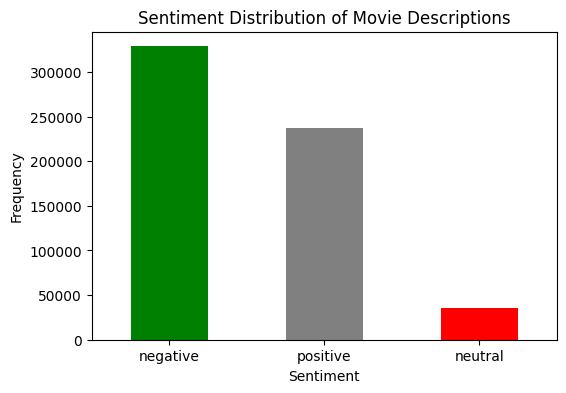

In [202]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiments
plt.figure(figsize=(6, 4))
sentiment_distribution.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution of Movie Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


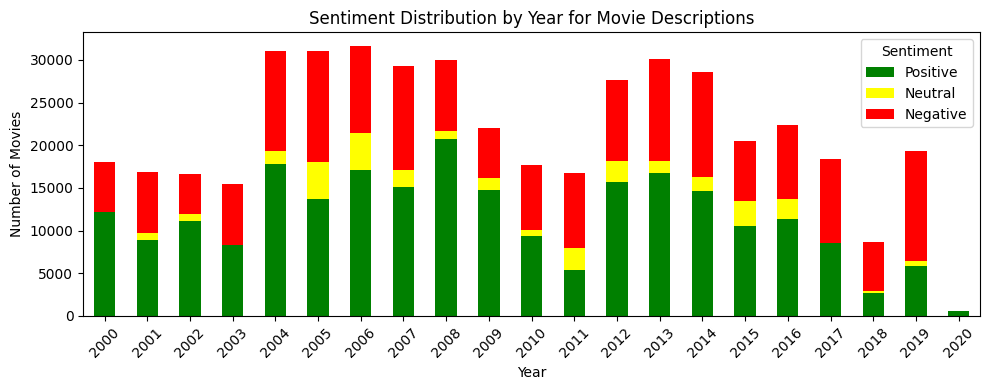

In [210]:
# Filter the merged_df to include only rows where 'year' is between 1970 and the maximum year in the dataset
merged_df_filtered = merged_df[(merged_df['year'] >= 2000) & (merged_df['year'] <= merged_df['year'].max())]

# Group the data by 'year' and 'sentiment' to count occurrences
sentiment_by_year = merged_df_filtered.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
sentiment_by_year.plot(kind='bar', stacked=True, color=['green', 'yellow', 'red'], figsize=(10, 4))

# Customize the plot
plt.title('Sentiment Distribution by Year for Movie Descriptions')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', labels=['Positive', 'Neutral', 'Negative'])
plt.tight_layout()

# Show the plot
plt.show()


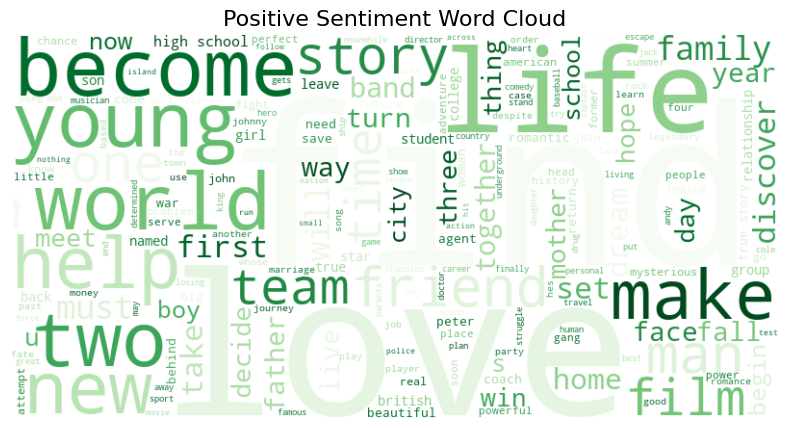

In [215]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all positive descriptions
sample_data['sentiment'] = sample_data['cleaned_description'].apply(get_sentiment)

positive_text = ' '.join(sample_data[sample_data['sentiment'] == 'positive']['cleaned_description'].dropna())

# Generate word cloud
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=16)
plt.show()


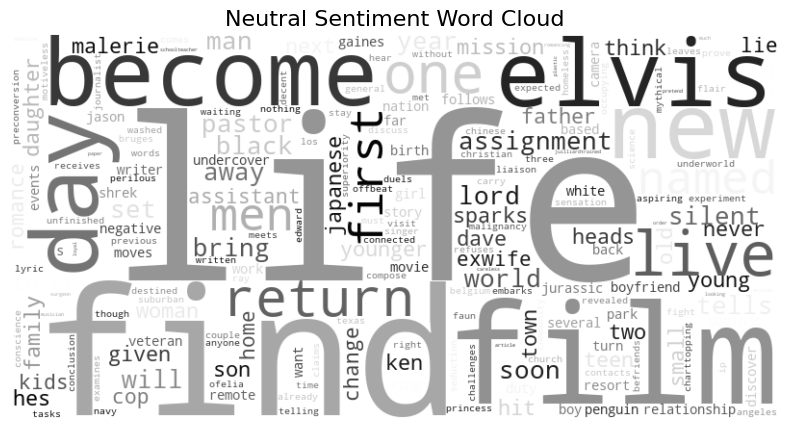

In [216]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all neutral descriptions
sample_data['sentiment'] = sample_data['cleaned_description'].apply(get_sentiment)
neutral_text = ' '.join(sample_data[sample_data['sentiment'] == 'neutral']['cleaned_description'].dropna())

# Generate word cloud
neutral_wc = WordCloud(width=800, height=400, background_color='white', colormap='gray').generate(neutral_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(neutral_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Word Cloud', fontsize=16)
plt.show()


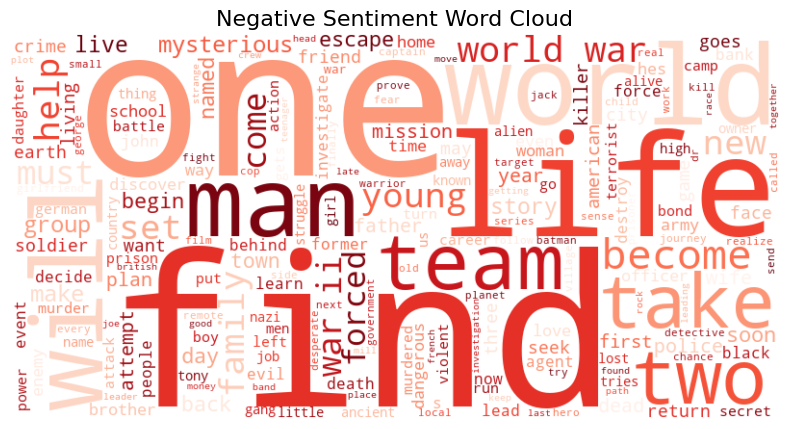

In [217]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all negative descriptions
sample_data['sentiment'] = sample_data['cleaned_description'].apply(get_sentiment)
negative_text = ' '.join(sample_data[sample_data['sentiment'] == 'negative']['cleaned_description'].dropna())

# Generate word cloud
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=16)
plt.show()


In [ ]:
#cold start problem by predicting genres

In [218]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Select only required columns
df = merged_df[['description', 'genres']].copy()

# Step 2: Drop rows with missing descriptions or genres
df = df.dropna(subset=['description', 'genres'])

# Step 3: Split genres into lists
df['genres_list'] = df['genres'].apply(lambda x: x.strip(';').split(';'))

# Step 4: Convert genres to binary multi-label format
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genres_list'])

# Step 5: Extract description as features
X = df['description'].tolist()

# Optional: Check
print(f"Number of samples: {len(X)}")
print("Genres:", mlb.classes_)


Number of samples: 601501
Genres: [' action' ' adventure' ' biography' ' comedy' ' crime' ' drama'
 ' fantasy' ' history' ' horror' ' music' ' mystery' ' romance' ' sci-fi'
 ' sport' ' thriller' ' war' ' western' 'action' 'adventure' 'animation'
 'biography' 'comedy' 'crime' 'drama' 'fantasy' 'horror' 'mystery'
 'romance' 'sci-fi' 'thriller']


In [269]:
merged_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,year,run_length,genres,imdb_rating,num_raters,num_reviews,description,genres_clean,cleaned_description,sentiment,avg_rating
0,imme-van-gorp,7.0,102,123,unfortunately the ending ruined an otherwise g...,this movie is full of suspense. it makes you g...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",after car accident michelle awakens find herse...,negative,6.711538
1,sonofocelot-1,5.0,385,500,...oh dear abrams. again.,i'll leave this review fairly concise. <br/><b...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",after car accident michelle awakens find herse...,negative,6.711538
2,mhodaee,5.0,110,143,"fantastic, gripping, thoroughly enjoyable, unt...",i give the 5/10 out of the credit i owe to the...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",after car accident michelle awakens find herse...,negative,6.711538
3,fil-nik09,5.0,73,100,hmmm...,"first of all, i must say that i was expecting ...",10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",after car accident michelle awakens find herse...,negative,6.711538
4,dvr_brale,7.0,42,56,slow building & plot alternating claustrophobi...,i've always loved movies with strong atmospher...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",after car accident michelle awakens find herse...,negative,6.711538


In [313]:
#sentiment analysis of reviews
#VADER

In [304]:
import pandas as pd

# Sample a subset of 500 movies from the merged_df (adjust the number as needed)
sample_data = merged_df.sample(n=10000, random_state=42).reset_index(drop=True)

# Ensure that 'review' and 'genres' columns are present and clean
sample_data = sample_data.dropna(subset=['review', 'genres'])

# Extract the 'review' column for sentiment analysis
reviews = sample_data[['movie_name_clean', 'review', 'genres', 'user_rating']]

# Preview the data
reviews.head()


,movie_name_clean,review,genres,user_rating
0,signs,"this movie is slow, and yet it starts up with ...",drama; mystery; sci-fi;,9.0
1,the wrestler,"i have never, ever been so taken with a film. ...",drama; sport;,10.0
2,minions,"i was skeptical when i saw ratings, but it was...",animation; adventure; comedy;,8.0
3,straight outta compton,when i heard that a film was being made about ...,biography; drama; history;,8.0
4,super 8,under producer spielberg's assumed tutelage an...,mystery; sci-fi; thriller;,8.0


In [305]:
import re
import string

# Function for basic text cleaning
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'<[^>]*>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

# Apply cleaning to all reviews
sample_data['cleaned_review'] = sample_data['review'].apply(clean_text)

# Preview the cleaned reviews
sample_data[['movie_name_clean', 'cleaned_review', 'user_rating']].head()


,movie_name_clean,cleaned_review,user_rating
0,signs,this movie is slow and yet it starts up with a...,9.0
1,the wrestler,i have never ever been so taken with a film i ...,10.0
2,minions,i was skeptical when i saw ratings but it wasn...,8.0
3,straight outta compton,when i heard that a film was being made about ...,8.0
4,super 8,under producer spielbergs assumed tutelage and...,8.0


In [306]:
import string

# Define a list of stopwords (can expand this list as needed)
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", 
    "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", 
    "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", 
    "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", 
    "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", 
    "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should",
    "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", "hadn", "hasn", "haven", "isn", "ma", 
    "mightn", "mustn", "needn", "shan", "shouldn", "wasn", "weren", "won", "wouldn"
])

# Function for manual tokenization and removing stopwords
def manual_tokenize_and_remove_stopwords(text):
    # Convert text to lowercase and split it into words
    words = text.lower().split()
    
    # Remove punctuation and non-alphabetic characters
    words = [word.strip(string.punctuation) for word in words if word.strip(string.punctuation).isalpha()]
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords]
    
    return " ".join(words)

# Apply manual tokenization and stopwords removal to cleaned reviews
sample_data['cleaned_review'] = sample_data['cleaned_review'].apply(manual_tokenize_and_remove_stopwords)

# Preview the cleaned reviews after tokenization and stopwords removal
sample_data[['movie_name_clean', 'cleaned_review', 'user_rating']].head()


,movie_name_clean,cleaned_review,user_rating
0,signs,movie slow yet starts event first minute scary...,9.0
1,the wrestler,never ever taken film went two friends luckily...,10.0
2,minions,skeptical saw ratings wasnt first time pleasan...,8.0
3,straight outta compton,heard film made favourite music band decided s...,8.0
4,super 8,producer spielbergs assumed tutelage inspirati...,8.0


In [307]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(review):
    # Get the sentiment score
    sentiment = sia.polarity_scores(review)
    # Return the compound score (this ranges from -1 (negative) to 1 (positive))
    return sentiment['compound']

# Apply the sentiment analysis to each cleaned review
sample_data['r_sentiment_score'] = sample_data['cleaned_review'].apply(get_sentiment_score)

# Preview the sentiment scores for each review
sample_data[['movie_name_clean', 'cleaned_review', 'r_sentiment_score', 'user_rating']].head()


,movie_name_clean,cleaned_review,r_sentiment_score,user_rating
0,signs,movie slow yet starts event first minute scary...,-0.9065,9.0
1,the wrestler,never ever taken film went two friends luckily...,0.4195,10.0
2,minions,skeptical saw ratings wasnt first time pleasan...,0.9811,8.0
3,straight outta compton,heard film made favourite music band decided s...,0.8988,8.0
4,super 8,producer spielbergs assumed tutelage inspirati...,0.8950,8.0


In [308]:
# Classify sentiment based on VADER scores
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification to sentiment scores
sample_data['predicted_sentiment'] = sample_data['r_sentiment_score'].apply(classify_sentiment)

# Preview the resulting classifications
sample_data[['movie_name_clean', 'cleaned_review', 'r_sentiment_score', 'predicted_sentiment', 'user_rating']].head()


,movie_name_clean,cleaned_review,r_sentiment_score,predicted_sentiment,user_rating
0,signs,movie slow yet starts event first minute scary...,-0.9065,Negative,9.0
1,the wrestler,never ever taken film went two friends luckily...,0.4195,Positive,10.0
2,minions,skeptical saw ratings wasnt first time pleasan...,0.9811,Positive,8.0
3,straight outta compton,heard film made favourite music band decided s...,0.8988,Positive,8.0
4,super 8,producer spielbergs assumed tutelage inspirati...,0.8950,Positive,8.0


In [309]:
sample_data = sample_data[[
    'movie_name_clean', 'cleaned_review', 'r_sentiment_score', 'predicted_sentiment', 'avg_rating', 'user_rating'
]]


In [310]:
sample_data['actual_sentiment'] = sample_data['avg_rating'].apply(
    lambda x: 'Positive' if x >= 7.0 else 'Negative'
)


(10000, 7)
              precision    recall  f1-score   support

    Negative       0.51      0.26      0.34      4066
     Neutral       0.00      0.00      0.00         0
    Positive       0.62      0.82      0.71      5934

    accuracy                           0.59     10000
   macro avg       0.38      0.36      0.35     10000
weighted avg       0.58      0.59      0.56     10000



C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


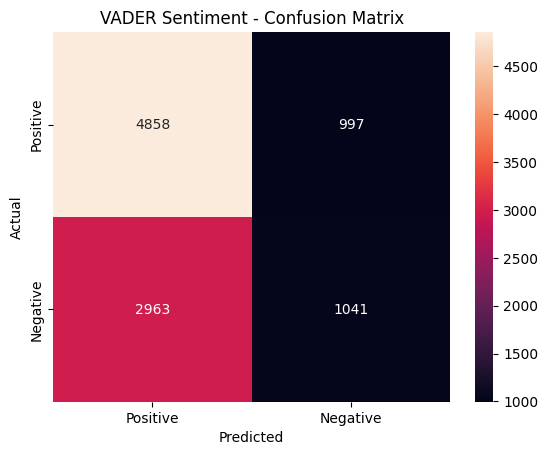

In [311]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Remove duplicates based on review text and movie name
sample_data_unique = sample_data.drop_duplicates(subset=['movie_name_clean', 'cleaned_review'])
print(sample_data.shape)
# Classification report
print(classification_report(
    sample_data_unique['actual_sentiment'],
    sample_data_unique['predicted_sentiment']
))

# Assign y_true and y_pred
y_true = sample_data_unique['actual_sentiment']
y_pred = sample_data_unique['predicted_sentiment']

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['Positive', 'Negative'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('VADER Sentiment - Confusion Matrix')
plt.show()


In [312]:
# Encode the sentiments: Positive -> 1, Negative -> 0
sample_data_unique['actual_sentiment'] = sample_data_unique['actual_sentiment'].map({'Positive': 1, 'Negative': 0})

# Check the changes in the dataframe
sample_data_unique.head()


,movie_name_clean,cleaned_review,r_sentiment_score,predicted_sentiment,avg_rating,user_rating,actual_sentiment
0,signs,movie slow yet starts event first minute scary...,-0.9065,Negative,6.315878,9.0,0
1,the wrestler,never ever taken film went two friends luckily...,0.4195,Positive,8.037175,10.0,1
2,minions,skeptical saw ratings wasnt first time pleasan...,0.9811,Positive,5.682493,8.0,0
3,straight outta compton,heard film made favourite music band decided s...,0.8988,Positive,7.957333,8.0,1
4,super 8,producer spielbergs assumed tutelage inspirati...,0.8950,Positive,6.316049,8.0,0


In [314]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the cleaned_review column to get the bag-of-words representation
X = vectorizer.fit_transform(sample_data_unique['cleaned_review'])

# Check the shape of the transformed data
X.shape


(10000, 69243)

In [315]:
from sklearn.model_selection import train_test_split

# Extract the features (X) and target labels (y)
X = vectorizer.transform(sample_data_unique['cleaned_review'])
y = sample_data_unique['actual_sentiment']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8000, 69243), (2000, 69243), (8000,), (2000,))

In [317]:
#logistic regression

In [316]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Check the training accuracy
train_accuracy = lr_model.score(X_train, y_train)
train_accuracy

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Evaluate performance on test data
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


              precision    recall  f1-score   support

           0       0.72      0.70      0.71       797
           1       0.81      0.82      0.81      1203

    accuracy                           0.77      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.77      0.77      0.77      2000



In [318]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming 'sample_data_unique' is the dataset you're using
# Use the cleaned reviews as input text
X = sample_data_unique['cleaned_review']
y = sample_data_unique['actual_sentiment']  # Sentiment labels (0 or 1)

# Step 1: Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limit number of features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 3: Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = lr_model.predict(X_test)

# Step 5: Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.62      0.69       797
           1       0.78      0.88      0.83      1203

    accuracy                           0.78      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.78      0.78      0.77      2000



In [319]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the class distribution
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the Logistic Regression model on the resampled data
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.76      0.74       797
           1       0.84      0.79      0.81      1203

    accuracy                           0.78      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.79      0.78      0.78      2000



In [320]:
#random forest

In [321]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_resampled, y_resampled)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.57      0.59       797
           1       0.73      0.76      0.74      1203

    accuracy                           0.68      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.68      0.68      0.68      2000



In [323]:
#SVM

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Prepare the data
X = sample_data_unique['cleaned_review']  # Text data (cleaned review)
y = sample_data_unique['actual_sentiment']  # Labels (sentiment)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Model with TF-IDF Vectorizer
svm_model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', class_weight='balanced'))

# Fit the model
svm_model.fit(X_train, y_train)

# Predict the results
svm_preds = svm_model.predict(X_test)

# Evaluate the model

print("SVM Classification Report:\n", classification_report(y_test, svm_preds))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75       797
           1       0.85      0.81      0.83      1203

    accuracy                           0.80      2000
   macro avg       0.79      0.80      0.79      2000
weighted avg       0.80      0.80      0.80      2000



In [325]:
#Decision Tree

In [335]:
from sklearn.tree import DecisionTreeClassifier
# Reinitialize X_train, y_train, X_test, and y_test based on previous steps

X_train = tfidf_vectorizer.transform(sample_data_unique['cleaned_review'][:400])
X_test = tfidf_vectorizer.transform(sample_data_unique['cleaned_review'][400:])
y_train = sample_data_unique['actual_sentiment'][:400]
y_test = sample_data_unique['actual_sentiment'][400:]

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)


# Evaluate the model

print("DT Classification Report:\n", classification_report(y_test, y_pred_dt))


DT Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.43      0.44      3911
           1       0.62      0.63      0.62      5689

    accuracy                           0.55      9600
   macro avg       0.53      0.53      0.53      9600
weighted avg       0.55      0.55      0.55      9600



In [327]:
#Naive Bayes

In [333]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Naive Bayes Model with TF-IDF
nb_model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Fitting the Naive Bayes model
nb_model.fit(X_train, y_train)

# Predicting
nb_preds = nb_model.predict(X_test)

# Evaluating
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_preds))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.08      0.14       797
           1       0.62      1.00      0.77      1203

    accuracy                           0.63      2000
   macro avg       0.80      0.54      0.45      2000
weighted avg       0.77      0.63      0.52      2000



In [ ]:
# Assume you already have this
df = sample_data_unique.copy()

# Keep only the required columns
df = df[['cleaned_review', 'actual_sentiment']].dropna()

# Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned_review'].tolist(), df['actual_sentiment'].tolist(), test_size=0.2, random_state=42
)
